###  APPLICATION OF THE CLUSTERING ALGORITHM 

* We are provided with data from the sales team with an expection to identify the existing sub-groups there in
 
* The dataset has various features of which are expected to identify the one that will be relevant in the exercise

#### Below is the guide to how the algorithm will be implemented effectively

*  the relevant python libraries shall be implemented.

*  a wrangling function shall be build to aid in the cleaning of the availed dataset to make it ready for the algorithm

*  the default model shall be built and trained to act as our refernce for the final model

*  with aid of the elbow technique, the required values of the number of clusters will be determined

*  then the final model shall be built

*  the obtained labels shall be appended to the original for analysis

*  and finally a dictinary for the different groups shall be created based on which further analysis shall be conducted to clearly understand the clusters



importing of the relevant python libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder
import numpy as np
from category_encoders import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import json
import pickle 

In [2]:
# suppresing the unneccary warnings along the way through the excercise

warnings.filterwarnings("ignore")

Building a wrangling function with below functionalities

*  identifying the object features wthin the dataset with the number of unique values not exceeding a count of 12

* it also identifies the numerical features while eliminating the ID feature

* later the columns are combined to call the reuired columns that shall relevant for the exercise

* it then applies the OneHotEncoder to the categorical features using the caterigorical names as the column headings

In [3]:
def wrangle_fun(filepath):
    
    df = pd.read_csv(filepath)
    
    string_columns = df.select_dtypes("object").nunique()[df.select_dtypes("object").nunique()<=12].index
    
    num_columns = df.select_dtypes(["int","float"]).iloc[:,1:].columns
    
    cols = string_columns.to_list()+num_columns.to_list()
    
    df = df[cols]
    
    ohe = OneHotEncoder(use_cat_names=True)
    
    df = ohe.fit_transform(df)    
    
    return df

data = wrangle_fun("sales_record.csv")

data.head()

,Region_Central America and the Caribbean,Region_Europe,Region_Asia,Region_Middle East and North Africa,Region_Australia and Oceania,Region_Sub-Saharan Africa,Region_North America,Item Type_Baby Food,Item Type_Snacks,Item Type_Beverages,...,Order Priority_M,Order Priority_C,Order Priority_L,Order Priority_H,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,552,255.28,159.42,140914.56,87999.84,52914.72
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,2167,152.58,97.44,330640.86,211152.48,119488.38
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,4778,47.45,31.79,226716.10,151892.62,74823.48
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,7542,152.58,97.44,1150758.36,734892.48,415865.88


In [4]:
# checking out for the columns (features) that could be having empty values , well enough all the features done have NaN values

data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

Since the data various scales of the values, there is need to harmonise the values. This was effected with the aid of the standard scaler that 

produced features values with a mean  of zero (0) and standard deviation of one (1) as shown below from the execution of the code 

"data_scaled.describe()" in the proceeding line of code

In [5]:
scaler = StandardScaler()

data_scaled= pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

data_scaled.head()

,Region_Central America and the Caribbean,Region_Europe,Region_Asia,Region_Middle East and North Africa,Region_Australia and Oceania,Region_Sub-Saharan Africa,Region_North America,Item Type_Baby Food,Item Type_Snacks,Item Type_Beverages,...,Order Priority_M,Order Priority_C,Order Priority_L,Order Priority_H,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,2.891936,-0.601995,-0.409819,-0.372763,-0.301248,-0.588128,-0.147171,3.199368,-0.294082,-0.313332,...,1.668835,-0.553939,-0.570268,-0.585973,-1.536841,-0.047855,-0.159152,-0.803146,-0.734380,-0.887262
1,2.891936,-0.601995,-0.409819,-0.372763,-0.301248,-0.588128,-0.147171,-0.312562,3.400414,-0.313332,...,-0.599220,1.805254,-0.570268,-0.585973,-0.982662,-0.517459,-0.510515,-0.674538,-0.627361,-0.713394
2,-0.345789,1.661144,-0.409819,-0.372763,-0.301248,-0.588128,-0.147171,-0.312562,-0.294082,3.191502,...,-0.599220,1.805254,-0.570268,-0.585973,-0.086712,-0.998174,-0.882683,-0.744985,-0.678857,-0.830044
3,-0.345789,-0.601995,2.440103,-0.372763,-0.301248,-0.588128,-0.147171,-0.312562,-0.294082,-0.313332,...,-0.599220,-0.553939,1.753562,-0.585973,1.367534,-0.274563,-0.399006,0.358489,0.106687,1.060554
4,-0.345789,-0.601995,2.440103,-0.372763,-0.301248,-0.588128,-0.147171,-0.312562,3.400414,-0.313332,...,-0.599220,1.805254,-0.570268,-0.585973,0.861739,-0.517459,-0.510515,-0.118612,-0.172235,0.060646


In [6]:
data_scaled.describe().loc[["mean","std"],:]

,Region_Central America and the Caribbean,Region_Europe,Region_Asia,Region_Middle East and North Africa,Region_Australia and Oceania,Region_Sub-Saharan Africa,Region_North America,Item Type_Baby Food,Item Type_Snacks,Item Type_Beverages,...,Order Priority_M,Order Priority_C,Order Priority_L,Order Priority_H,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
mean,-2.131628e-18,-1.005418e-16,-1.350031e-16,-4.405365e-17,3.979039e-17,-7.460699e-17,1.563194e-17,9.094947e-17,-1.421085e-17,7.105427e-17,...,-1.918465e-17,1.207923e-17,2.629008e-17,5.684342e-18,6.110668e-17,2.508216e-16,-3.552714e-17,-1.847411e-17,1.065814e-17,1.051603e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,...,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00


application of the principal component analysis (PCA) on the available scaled features to extract the variance in the features

for this PCA, the first two columns of variance were exxtracted as they represent most of the variance in the featrures

Principal Component 1 (PC_1) and Principal Component 2 (PC_2)

In [7]:
pca = PCA(n_components=2)

data_decomposed = pd.DataFrame(pca.fit_transform(data_scaled),columns=["PC_1","PC_2"])

data_decomposed.head()

,PC_1,PC_2
0,-1.313456,1.267155
1,-1.569281,-1.387109
2,-2.087146,-1.447817
3,0.351613,-1.111950
4,-0.609792,-1.246020


* a scatter plot was made for the extracted principal components to look out for available groups in the data

* from the scatter plot, there are two visible clusters, how this will be further evaluated to confirm the number of clusters

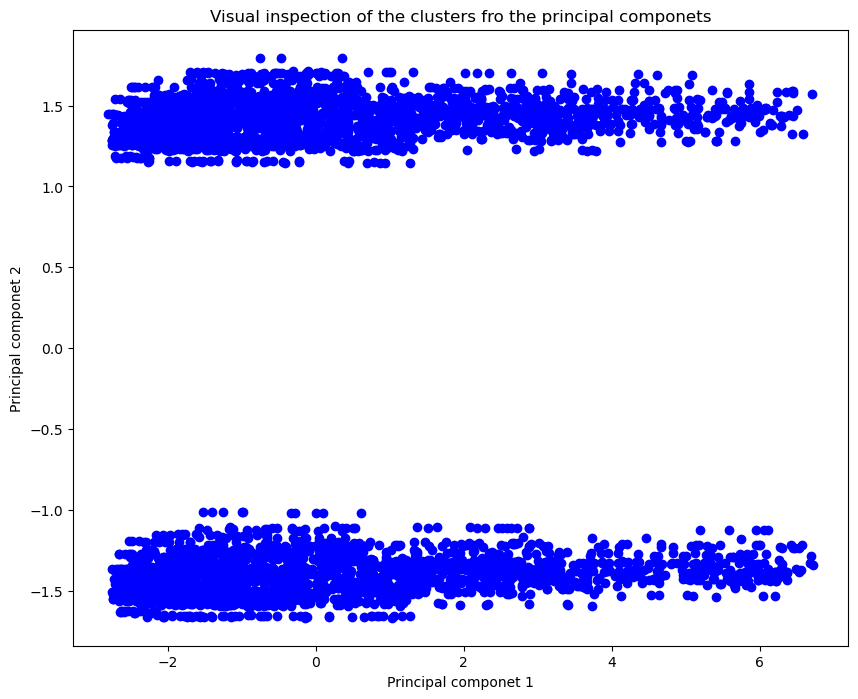

In [8]:
plt.subplots(figsize=(10,8))

plt.scatter(x="PC_1",y="PC_2",data=data_decomposed,c="blue")

plt.xlabel("Principal componet 1")

plt.ylabel("Principal componet 2")

plt.title("Visual inspection of the clusters fro the principal componets");

* the initial model is build on the asumption that there are only two cluster, therefore k = 2

In [9]:
n_clusters = 2

int_model = KMeans(n_clusters=2,random_state=42)

In [10]:
int_model.fit(data_decomposed)

KMeans(n_clusters=2, random_state=42)

* evaluating the model using the inertia error and the silhouette score values which will later be compared with those of the final model

In [11]:
initial_error = int_model.inertia_

In [12]:
labels = int_model.labels_

In [13]:
silhouette_score_init = silhouette_score(data_decomposed,labels)

In [14]:
print(f"the initial inertia error : {round(initial_error,2)}")
print(" ")
print(f"the initial silhouette score : {round(silhouette_score_init,4)}")

the initial inertia error : 16696.45
 
the initial silhouette score : 0.5028


implementation of the elbow technique

* lets initialize our range of the number of clusters as ranging from 2 to 20 (range(2,21,1))

* we shall build different models using the various values of number of clusters

* for each model, the inertia errors and the silhouette scores shall be obtained and appended to our initialzed lists of inertia_errors and Silohuette_scores

In [15]:
clusters = range(2,21,1)

Inertia_errors = []

Silohouette_scores = []

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 42)
    
    model.fit(data_decomposed)
    
    Inertia_errors.append(model.inertia_)
    
    Silohouette_scores.append(silhouette_score(data_decomposed,model.labels_))


* a plot of the number of clusters and the obtained inertia errors will give us the elbow structure

* from the obtained plot, the value of number of clusters in the range 5 to 7,

* the number will be confirmed with the plot of silhouette scores against number clusters and the one with a higher silhouette scores shall be taken

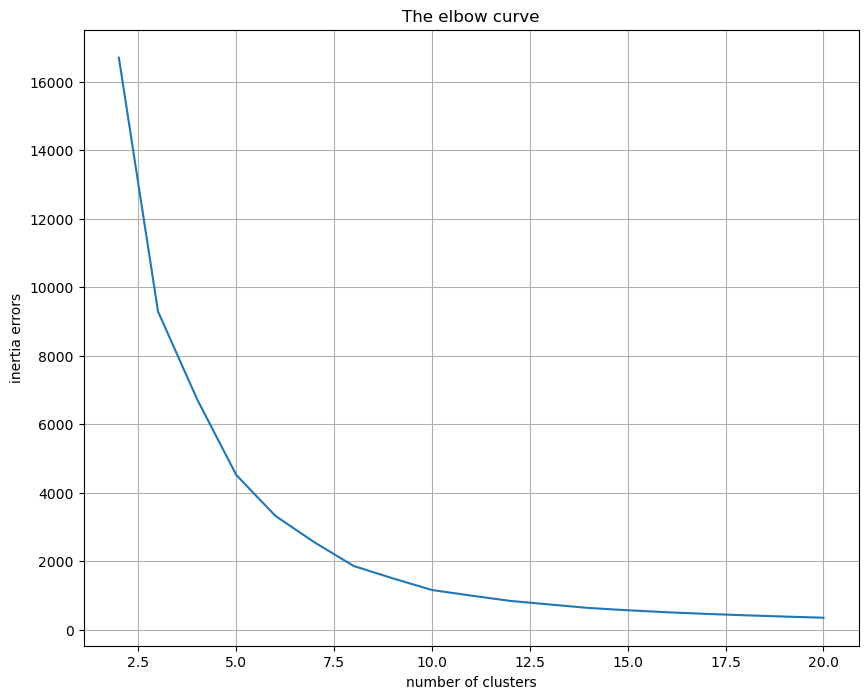

In [16]:
plt.subplots(figsize=(10,8))

plt.plot(clusters,Inertia_errors)

default_x = range(len(clusters))

plt.xlabel("number of clusters")

plt.ylabel("inertia errors")

plt.title("The elbow curve")

plt.grid()

Text(0.5, 1.0, 'A plot of silhouette scores against the number of clusters')

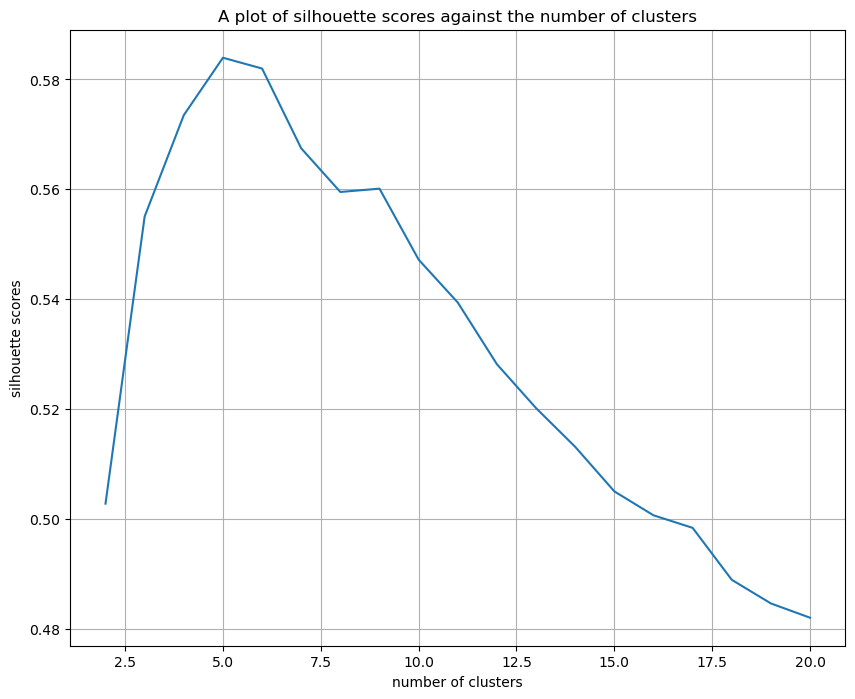

In [17]:
plt.subplots(figsize=(10,8))

plt.plot(clusters,Silohouette_scores)

plt.grid()

plt.xlabel("number of clusters")

plt.ylabel("silhouette scores")

plt.title("A plot of silhouette scores against the number of clusters")

* from the above plot, the number of clusters to be considered are 5, as it has the highest silhouette score

* therefore our final model is to built with n_clusters = 5

In [18]:
final_model = KMeans(n_clusters=5,random_state=42)

In [19]:
final_model.fit(data_decomposed)

KMeans(n_clusters=5, random_state=42)

In [20]:
final_inertia = final_model.inertia_

final_silhouette_score = silhouette_score(data_decomposed,final_model.labels_)

print(f"the initial inertia error : {round(initial_error,2)}")
print(" ")
print(f"the initial silhouette score : {round(silhouette_score_init,4)}")
print(" ")
print(f"the final inertia error : {round(final_inertia,2)}")
print(" ")
print(f"the final silhouette score : {round(final_silhouette_score,4)}")

the initial inertia error : 16696.45
 
the initial silhouette score : 0.5028
 
the final inertia error : 4515.4
 
the final silhouette score : 0.5839


* there is an improvement in the results as, the inertia error has reduced and the silhouette score has increased

* adding generated labels from the model to our decomposed data

In [21]:
data_decomposed["label"] = final_model.labels_

In [22]:
data_decomposed.head()

,PC_1,PC_2,label
0,-1.313456,1.267155,0
1,-1.569281,-1.387109,3
2,-2.087146,-1.447817,3
3,0.351613,-1.111950,1
4,-0.609792,-1.246020,3


* a plot visualizing the discovered clusters in the data

In [23]:
labels = []

for v in data_decomposed["label"].unique().tolist():
    
    labels.append(f"cluster_{v}")

labels

['cluster_0', 'cluster_3', 'cluster_1', 'cluster_4', 'cluster_2']

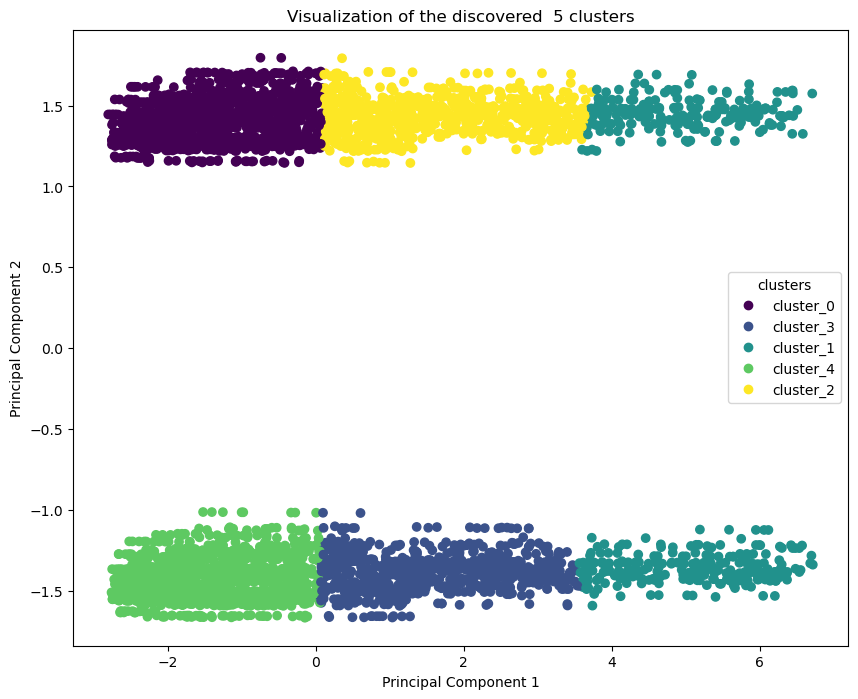

In [24]:
plt.subplots(figsize=(10,8))

scatter = plt.scatter(x="PC_1",y="PC_2",c="label",data=data_decomposed)

plt.xlabel("Principal Component 1")

plt.ylabel("Principal Component 2")

plt.title("Visualization of the discovered  5 clusters")

plt.legend(handles=scatter.legend_elements()[0],labels=labels,title="clusters");

* retrieving the sales data and appending the labels from the cluster model

In [25]:
def wrangle_analysis(filepath):
    
    df = pd.read_csv(filepath)
    
    col_drop = df.columns[[5,6,7]]
    
    df.drop(columns=col_drop, inplace = True)
    
    df["label"] = final_model.labels_
    
    return df

data_sales = wrangle_analysis("sales_record.csv")

data_sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,label
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,552,255.28,159.42,140914.56,87999.84,52914.72,0
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2167,152.58,97.44,330640.86,211152.48,119488.38,3
2,Europe,Czech Republic,Beverages,Offline,C,4778,47.45,31.79,226716.10,151892.62,74823.48,3
3,Asia,North Korea,Cereal,Offline,L,9016,205.70,117.11,1854591.20,1055863.76,798727.44,1
4,Asia,Sri Lanka,Snacks,Offline,C,7542,152.58,97.44,1150758.36,734892.48,415865.88,3


* creating and saving the dictionary as per the label groups

In [26]:
lbl = data_sales["label"].unique()

meta_data = {"columns_names" : data_sales.columns}

for lbl in data_sales["label"].unique():
    
    lbl_str = str(lbl)
    
    dict_data = {"group_" + lbl_str : data_sales[data_sales["label"]==lbl].to_numpy()}
    
    meta_data.update(dict_data)    
    

In [27]:
with open("sales_group.pkl","wb") as f :
    
    pickle.dump(meta_data, f)

* creating the csv file for different label groups for further analysis to understand the clusters

In [28]:
with open("sales_group.pkl","rb") as file:
    
    dictionary = pickle.load(file)

* the different csv file for the different groups are created for further analysis to understand the label groups

In [29]:
for i in data_sales["label"].unique():
    
    group = pd.DataFrame(dictionary[ f"group_{i}"],columns=dictionary["columns_names"])
    
    group.to_csv( f"group_{i}", index=False)
 

Presentation prepared by Abudusalaamu Kasozi 